### **Clustering Kabupaten/Kota Di Indonesia Berdasarkan Indikator Indeks Pembangunan Manusia**

Nama: Nurhadi Meilana

Nim: 1519621040

Dataset: Diperoleh dari website Badan Pusat Statistik (BPS) https://www.bps.go.id/id

Referensi: https://github.com/fatihdq/Clustering-The-Countries-for-Help-International

Link Colab: https://colab.research.google.com/drive/1xMnveQUGm18wv4uk6MpjGtqyyD-Ju0Z2?usp=sharing

Tujuan: mengelompokkan Kabupaten/Kota yang ada di Indonesia berdasarkan indikator IPM menggunakan algoritma K-Means, mengidentifikasi pola-pola kelompok wilayah yang serupa berdasarkan indikator IPM, memberikan pemahaman yang lebih dalam tentang perbedaan dan kesamaan antar wilayah dalam pembangunan manusia, dan memungkinkan pemerintah untuk lebih efektif menyesuaikan program-program pembangunan yang spesifik dengan kebutuhan setiap klaster wilayah.

### **Import Library**

In [ ]:
# Mengimpor pustaka NumPy dan Pandas untuk manipulasi data
import numpy as np
import pandas as pd

# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi data
import matplotlib.pyplot as plt

# Mengimpor pustaka Seaborn untuk visualisasi yang lebih menarik
import seaborn as sns

# Mengimpor modul StandardScaler dari Scikit-learn untuk standarisasi data
from sklearn.preprocessing import StandardScaler

# Mengimpor algoritma KMeans dari Scikit-learn untuk klastering data
from sklearn.cluster import KMeans

# Mengimpor fungsi calinski_harabasz_score untuk mengukur kinerja klastering
from sklearn.metrics import calinski_harabasz_score

# Mengimpor modul os dan warnings untuk fungsionalitas sistem operasi dan pengaturan peringatan
import os
import warnings

# Menonaktifkan tampilan peringatan yang dihasilkan oleh Python
warnings.filterwarnings('ignore')

### **Read Dataset**

In [ ]:
# Membaca dataset indikator IPM Indonesia tahun 2023
df = pd.read_excel('/content/Data Indikator IPM Indonesia 2023.xlsx')
df

,Provinsi,Kabupaten/Kota,UHH,HLS,RLS,PPK,PPM
0,Aceh,Simeulue,65.61,14.28,9.81,7686,17.92
1,Aceh,Aceh Singkil,67.78,14.35,8.70,9374,19.15
2,Aceh,Aceh Selatan,64.81,14.70,8.91,8712,12.10
3,Aceh,Aceh Tenggara,68.65,14.27,10.09,8566,12.45
4,Aceh,Aceh Timur,69.07,13.07,8.47,9436,13.39
...,...,...,...,...,...,...,...
509,Papua,Puncak,66.40,5.59,2.19,5975,36.44
510,Papua,Dogiyai,66.39,10.62,4.97,6182,29.20
511,Papua,Intan Jaya,66.12,7.69,3.27,6140,40.01
512,Papua,Deiyai,65.93,9.85,3.27,5104,38.66


### **Data Understanding**

**Deskripsi Variabel**

Provinsi: Nama Provinsi di Indonesia

Kabupaten/Kota: Nama Kabupaten/Kota di Indonesia

UHH : Umur Harapan Hidup Saat Lahir (Tahun)

HLS : Harapan Lama Sekolah (Tahun)

RLS : Rata-rata Lama Sekolah (Tahun)

PPK : Pengeluaran Per Kapita (Ribu Rupiah/Orang/Tahun)

PPM : Persentase Penduduk Miskin (%)

In [ ]:
# Mengetahui informasi ringkas dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        514 non-null    object 
 1   Kabupaten/Kota  514 non-null    object 
 2   UHH             514 non-null    float64
 3   HLS             514 non-null    float64
 4   RLS             514 non-null    float64
 5   PPK             514 non-null    int64  
 6   PPM             514 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 28.2+ KB


Pada dataset tersebut terdapat 514 baris dan 7 kolom. Dataset tersebut memiliki 2 tipe data object yaitu kolom Provinsi dan Kabupaten/Kota, 4 tipe data float yaitu kolom UHH, HLS, RLS, dan PPM, serta 1 tipe data int yaitu kolom PPK.

In [ ]:
# Mengetahui ringkasan statistik dari kolom-kolom bertipe objek dalam dataset
df.describe(include='object')

,Provinsi,Kabupaten/Kota
count,514,514
unique,34,514
top,Jawa Timur,Simeulue
freq,38,1


Pada dataset tersebut terdapat 34 Provinsi dan 514 Kabupaten/Kota yang ada di Indonesia. Provinsi dengan Kabupaten/Kota terbanyak adalah Jawa Timur dengan 38 Kabupaten/Kota.

In [ ]:
# Mengetahui ringkasan statistik deskriptif dari dataset
df.describe()

,UHH,HLS,RLS,PPK,PPM
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,70.200214,13.149202,8.652451,11015.134241,11.499903
std,3.385248,1.300281,1.614753,2779.370803,7.154441
min,55.720000,4.330000,1.710000,4352.000000,2.270000
25%,68.027500,12.540000,7.760000,9165.500000,6.570000
50%,70.450000,13.060000,8.530000,10889.000000,9.615000
75%,72.570000,13.710000,9.547500,12483.750000,14.107500
max,77.930000,17.930000,13.040000,24975.000000,40.010000


*   count: jumlah baris dari setiap kolom
*   mean: nilai rata-rata dari setiap kolom
*   std: nilai standar deviasi dari setiap kolom, yaitu ukuran seberapa tersebarnya nilai-nilai dalam dataset dari nilai rata-rata
*   min: nilai minimum dari setiap kolom
*   25%: nilai kuartil pertama dari setiap kolom, yaitu nilai yang membagi 25% data terendah dalam urutan terurut
*   50%: nilai kuartil kedua atau median dari setiap kolom, yaitu nilai tengah dalam urutan data ketika diurutkan dari terkecil hingga terbesar
*   75%: nilai kuartil ketiga dari setiap kolom, yaitu nilai yang membagi 75% data terendah dalam urutan terurut
*   max: nilai maksimum dari setiap kolom

In [ ]:
# Menghitung jumlah nilai null (kosong) dari setiap kolom pada dataset
df.isnull().sum()

Provinsi          0
Kabupaten/Kota    0
UHH               0
HLS               0
RLS               0
PPK               0
PPM               0
dtype: int64

Pada dataset tersebut tidak memiliki nilai null, sehingga tidak perlu dilakukan handling missing value.

In [ ]:
# Mengetahui apakah terdapat data duplikat dalam dataset tersebut
df.duplicated().sum()

0

Pada dataset tersebut tidak memiliki data duplikat

### **Exploratory Data Analysis**

**a. Univariate Analysis**

Pada univariate analysis, akan dilakukan ploting histogram untuk melihat distribusi dari setiap variabel, hal ini dilakukan untuk mengetahui dimana data itu terkonsentrasi dan apakah data itu teridentifikasi adanya outliers.

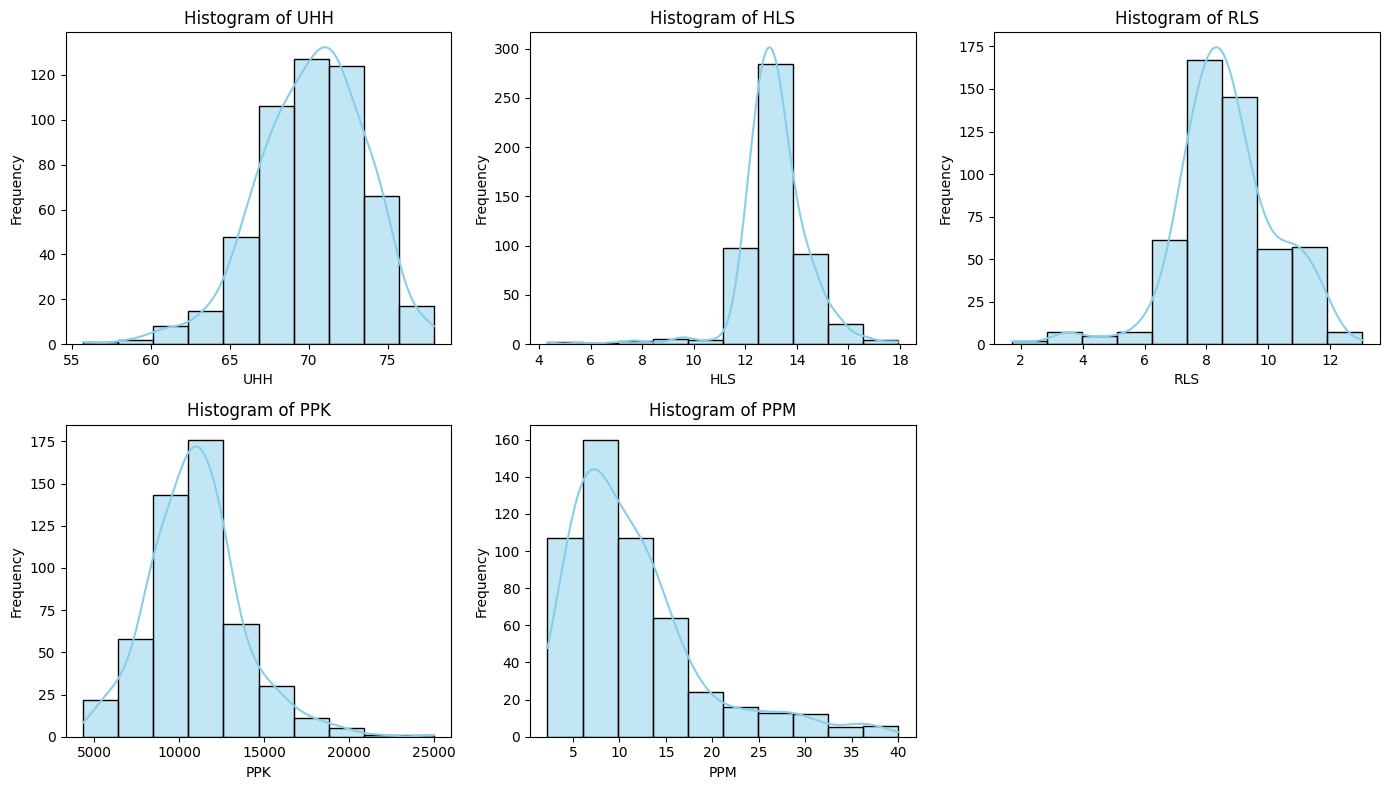

In [ ]:
# Kolom-kolom yang akan diplot dalam histogram
columns_to_plot = ['UHH', 'HLS', 'RLS', 'PPK', 'PPM']

# Membuat figure untuk plot dengan ukuran 14x8 inch
plt.figure(figsize=(14, 8))

# Loop melalui kolom-kolom yang akan diplot
for i, column in enumerate(columns_to_plot, 1):
    # Membuat subplot dengan baris 2, kolom 3, dan nomor subplot ke-i
    plt.subplot(2, 3, i)

    # Menggambar histogram menggunakan Seaborn histplot
    sns.histplot(df[column], bins=10, kde=True, color='skyblue', edgecolor='black')

    # Menambahkan judul pada subplot
    plt.title(f'Histogram of {column}')

    # Memberi label sumbu x dengan nama kolom
    plt.xlabel(column)

    # Memberi label sumbu y dengan 'Frequency' (Frekuensi)
    plt.ylabel('Frequency')

# Mengatur layout subplot agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan grafik histogram tersebut, kesulurah distribusi data dari setiap variabel terindikasi memiliki outlier. Kemudian grafik distribusi variabel tersebut memiliki skewness baik itu positif maupun negatif.

*   Histogram UHH memiliki skewness negatif, yang menunjukkan bahwa sebagian besar Kabupaten/Kota memiliki umur harapan hidup yang relatif tinggi atau mendekati rata-rata, sedangkan sebagian kecil Kabupaten/Kota memiliki umur harapan hidup yang jauh lebih rendah.
*   Histogram HLS memiliki skewness negatif, yang menunjukkan bahwa sebagian besar Kabupaten/Kota memiliki nilai harapan lama sekolah cenderung tinggi atau mendekati rata-rata, sementara sebagian kecil Kabupaten/Kota memiliki nilai harapan lama sekolah yang jauh lebih rendah.
*   Histogram RLS memiliki skewness negatif, yang menunjukkan bahwa sebagian besar Kabupaten/Kota memiliki nilai rata-rata lama sekolah cenderung tinggi atau mendekati rata-rata, sementara sebagian kecil Kabupaten/Kota memiliki nilai rata-rata lama sekolah yang jauh lebih rendah.
*   Histogram PPK memiliki skewness positif, yang menunjukkan bahwa sebagian besar Kabupaten/Kota memiliki nilai pendapatan per kapita cenderung rendah atau mendekati rata-rata, sementara sebagian kecil Kabupaten/Kota memiliki nilai pendapatan per kapita yang jauh lebih tinggi.
*   Histogram PPM memiliki skewness positif, yang menunjukkan bahwa sebagian besar Kabupaten/Kota memiliki nilai persentase penduduk miskin cenderung rendah atau mendekati rata-rata, sementara sebagian kecil Kabupaten/Kota memiliki nilai persentase penduduk miskin yang jauh lebih tinggi.


**b. Bivariate Analysis**

Pada bivariate analisys, akan dilakukan ploting untuk masing-masing variabel untuk menjawab pertanyaan sederhana yaitu "5 Kabupaten/Kota yang memiliki nilai tertinggi dan terendah dari setiap variabel".

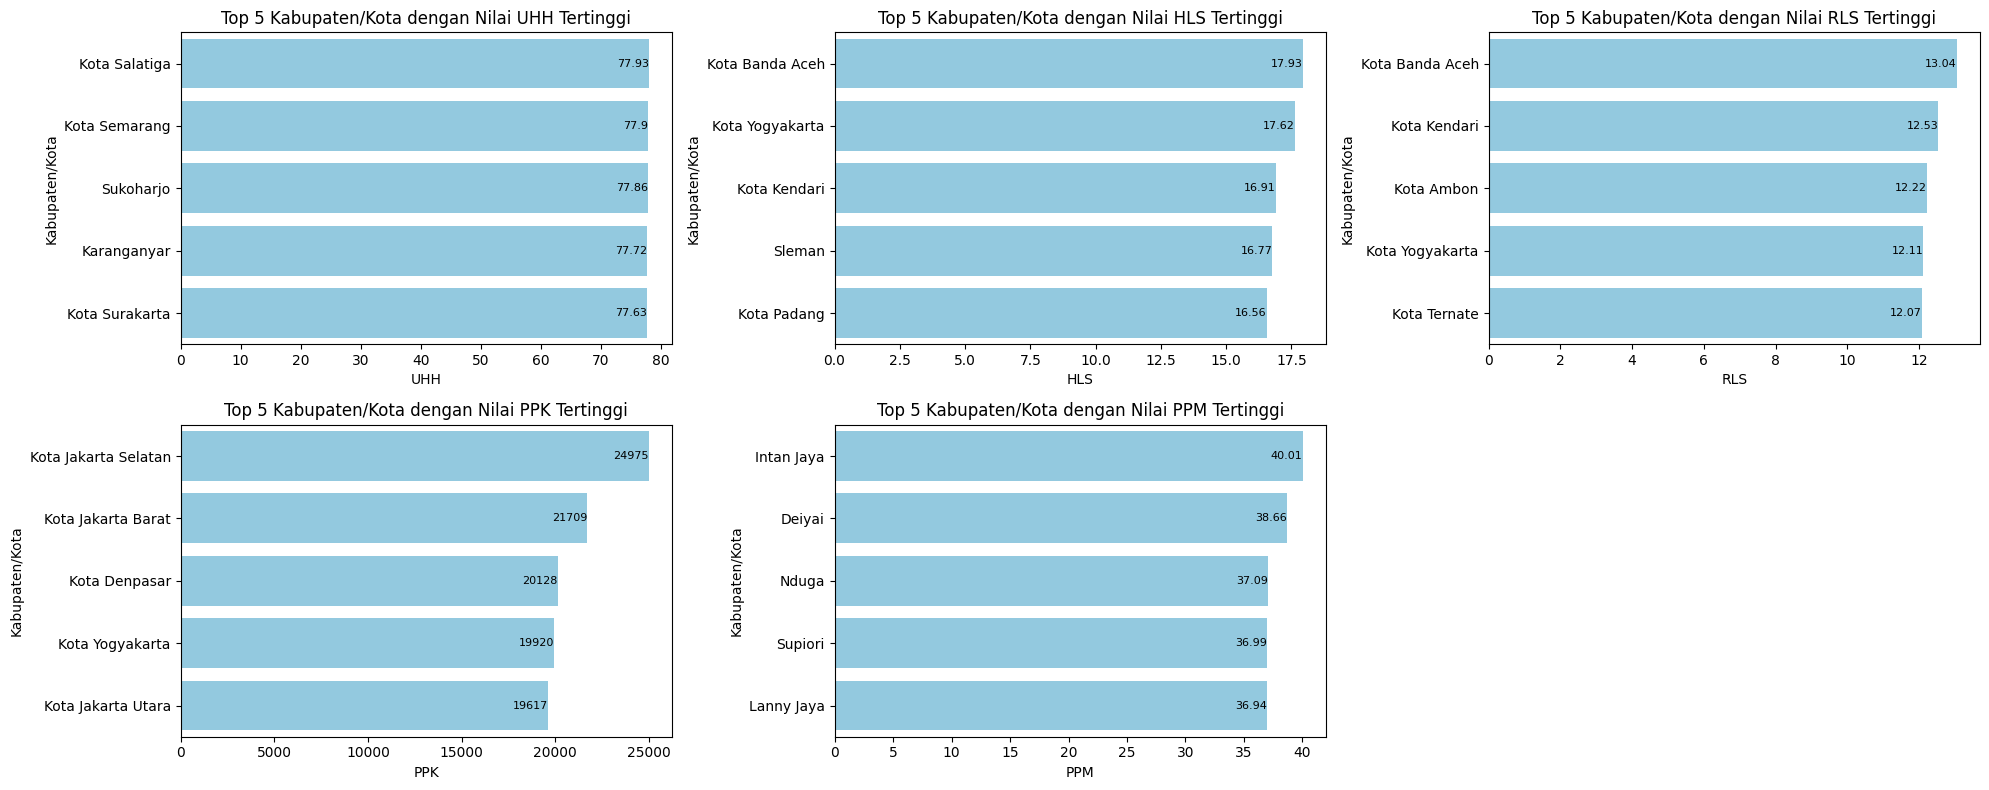

In [ ]:
# Kolom-kolom yang akan diplot dalam diagram batang (bar plot) untuk 5 nilai tertinggi
columns_to_plot = ['UHH', 'HLS', 'RLS', 'PPK', 'PPM']

# Membuat figure untuk plot dengan ukuran 20x8 inch
plt.figure(figsize=(20, 8))

# Loop melalui setiap kolom untuk membuat diagram batang dari 5 nilai tertinggi
for i, column in enumerate(columns_to_plot, 1):
    # Mengambil 5 nilai tertinggi dari setiap kolom
    top_5 = df[['Kabupaten/Kota', column]].sort_values(column, ascending=False).head(5)

    # Membuat subplot dengan baris 2, kolom 3, dan nomor subplot ke-i
    plt.subplot(2, 3, i)

    # Menggambar diagram batang menggunakan Seaborn barplot untuk 5 nilai tertinggi
    sns.barplot(x=column, y='Kabupaten/Kota', data=top_5, color='skyblue')

    # Menambahkan judul pada subplot
    plt.title(f'Top 5 Kabupaten/Kota dengan Nilai {column} Tertinggi')

    # Memberi label sumbu x dengan nama kolom
    plt.xlabel(column)

    # Memberi label sumbu y dengan 'Kabupaten/Kota'
    plt.ylabel('Kabupaten/Kota')

    # Menambahkan label di dalam batang
    for index, value in enumerate(top_5[column]):
        plt.text(value, index, str(value), ha='right', va='center', fontsize=8, color='black')

# Mengatur layout subplot agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari hasil ploting bar chart diatas menunjukan bahwa untuk setiap Kabupaten/Kota yang memiliki umur harapan hidup, harapan lama sekolah, rata-rata lama sekolah, dan pendapatan per kapita tinggi merupakan Kabupaten/Kota dengan sektor kesehatan, pendidikan, dan sosial ekonomi yang baik. Sedangkan untuk Kabupaten/Kota yang memiliki nilai persentase penduduk miskin tinggi merupakan kabupaten/Kota dengan sektor sosial ekonomi yang buruk.

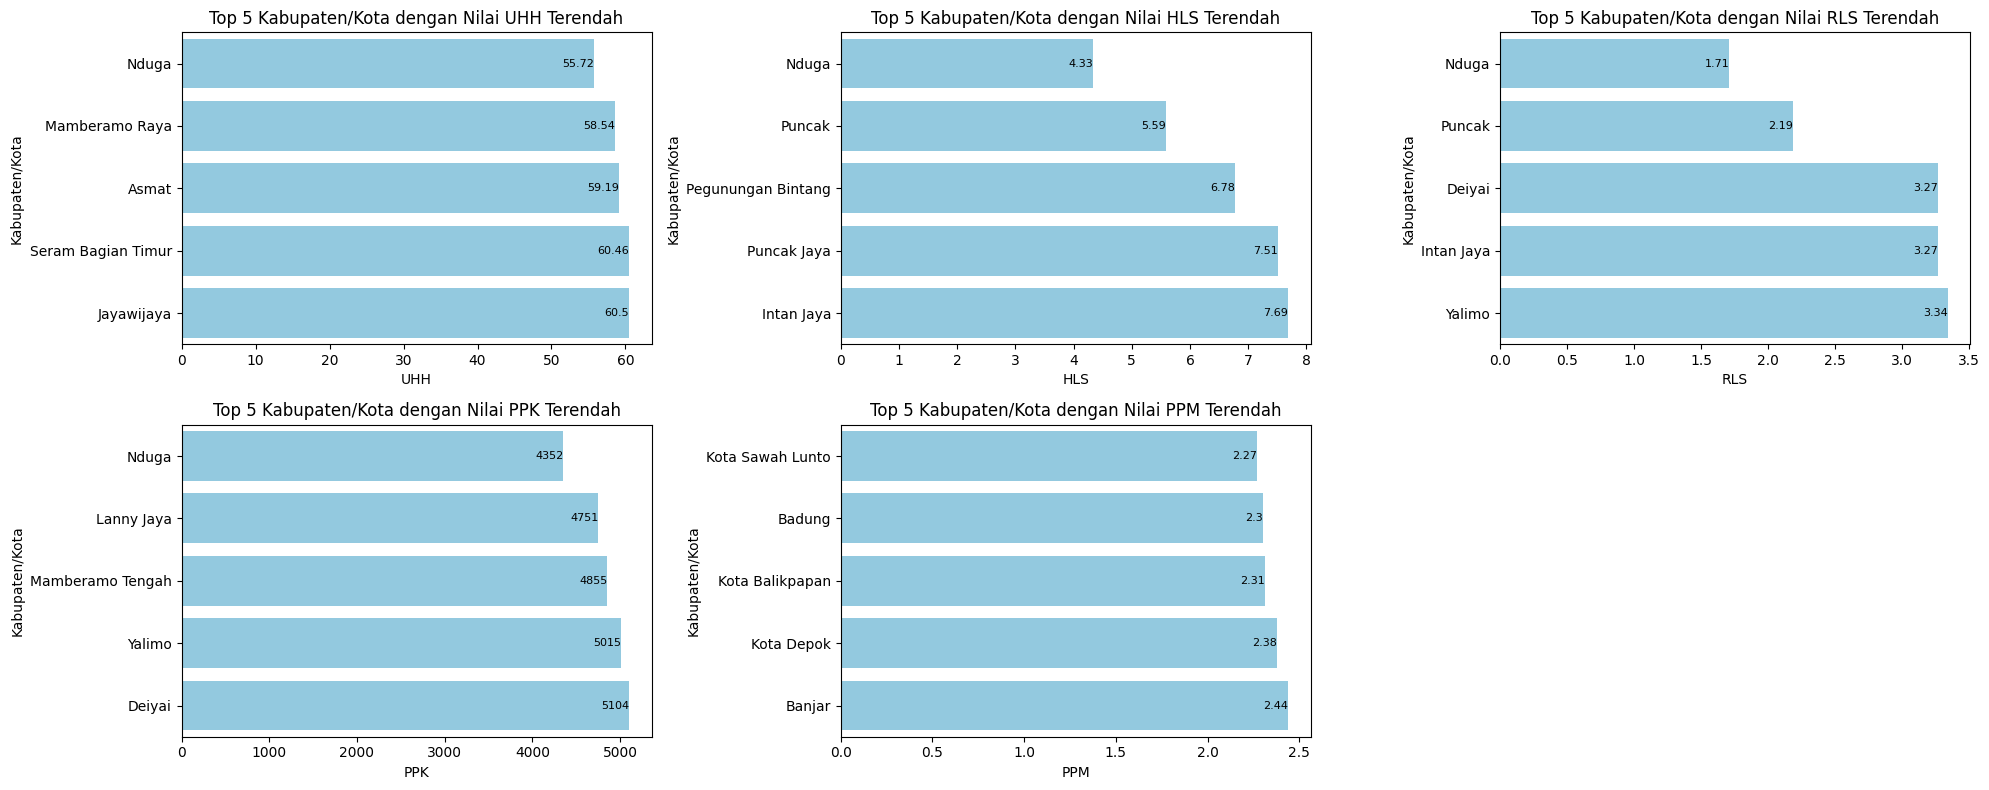

In [ ]:
# Kolom-kolom yang akan diplot dalam diagram batang (bar plot) untuk 5 nilai terendah
columns_to_plot = ['UHH', 'HLS', 'RLS', 'PPK', 'PPM']

# Membuat figure untuk plot dengan ukuran 20x8 inch
plt.figure(figsize=(20, 8))

# Loop melalui setiap kolom untuk membuat diagram batang dari 5 nilai terendah
for i, column in enumerate(columns_to_plot, 1):
    # Mengambil 5 nilai terendah dari setiap kolom
    bottom_5 = df[['Kabupaten/Kota', column]].sort_values(column, ascending=True).head(5)

    # Membuat subplot dengan baris 2, kolom 3, dan nomor subplot ke-i
    plt.subplot(2, 3, i)

    # Menggambar diagram batang menggunakan Seaborn barplot untuk 5 nilai terendah
    sns.barplot(x=column, y='Kabupaten/Kota', data=bottom_5, color='skyblue')

    # Menambahkan judul pada subplot
    plt.title(f'Top 5 Kabupaten/Kota dengan Nilai {column} Terendah')

    # Memberi label sumbu x dengan nama kolom
    plt.xlabel(column)

    # Memberi label sumbu y dengan 'Kabupaten/Kota'
    plt.ylabel('Kabupaten/Kota')

    # Menambahkan nilai-nilai sebagai teks pada diagram batang
    for index, value in enumerate(bottom_5[column]):
        plt.text(value, index, str(value), ha='right', va='center', fontsize=8, color='black')

# Mengatur layout subplot agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari hasil ploting bar chart diatas menunjukan bahwa untuk setiap Kabupaten/Kota yang memiliki umur harapan hidup, harapan lama sekolah, rata-rata lama sekolah, dan pendapatan per kapita rendah merupakan Kabupaten/Kota dengan sektor kesehatan, pendidikan, dan sosial ekonomi yang buruk. Sedangkan untuk Kabupaten/Kota yang memiliki nilai persentase penduduk miskin rendah merupakan kabupaten/Kota dengan sektor sosial ekonomi yang baik.

**c. Multivariate Analysis**

Pada multivariate analysis, akan dilakukan ploting untuk melihat hubungan korelasi antar variabel.

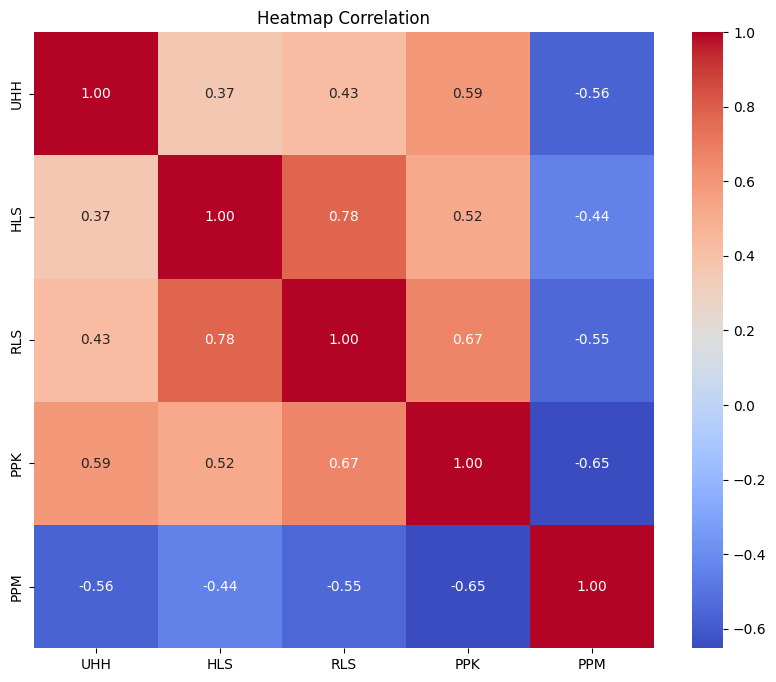

In [ ]:
# Menghitung korelasi antar kolom
df_corr = df.corr()

# Membuat figure untuk plot dengan ukuran 10x8 inch
plt.figure(figsize=(10, 8))

# Menggambar heatmap dengan menggunakan Seaborn
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")

# Menambahkan judul pada heatmap
plt.title("Heatmap Correlation")

# Menampilkan plot heatmap yang telah dibuat
plt.show()

*   Umur Harapan Hidup Saat Lahir (UHH): berkolerasi positif dengan HLS, RLS, PPK, dan berkolerasi negatif dengan PPM.
*   Harapan Lama Sekolah (HLS): berkolerasi positif dengan UHH, RLS, PPK, dan berkolerasi negatif dengan PPM.
*   Rata-rata Lama Sekolah (RLS): berkolerasi positif dengan UHH, HLS, PPK, dan berkolerasi negatif dengan PPM.
*   Pengeluaran Per Kapita (PPK): berkolerasi positif dengan UHH, HLS, RLS, dan berkolerasi negatif dengan PPM.
*   Persentase Penduduk Miskin (PPM): berkolerasi negatif dengan UHH, HLS, RLS, dan PPK.

### **Data Preparation**

**a. Handling Outlier**

Untuk mendeteksi ada atau tidaknya outlier pada sebuah variabel, akan dilakukan ploting box plot pada setiap variabel.

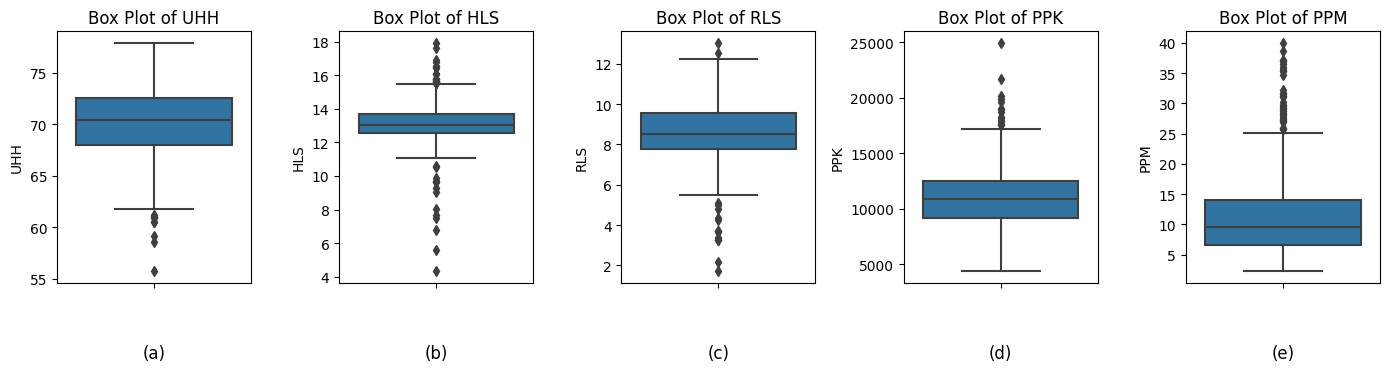

In [ ]:
# Kolom-kolom yang akan diplot dalam box plot
columns_to_plot = ['UHH', 'HLS', 'RLS', 'PPK', 'PPM']

# Membuat figure untuk plot dengan ukuran 14x4 inch
plt.figure(figsize=(14, 4))

# Loop melalui setiap kolom untuk membuat box plot
for i, column in enumerate(columns_to_plot, 1):
    # Membuat subplot dengan baris 1 dan jumlah kolom sesuai jumlah kolom dalam columns_to_plot
    plt.subplot(1, len(columns_to_plot), i)

    # Menggambar horizontal box plot menggunakan Seaborn
    sns.boxplot(data=df, y=column)

    # Memberi judul pada box plot dengan nama kolom yang bersangkutan
    plt.title(f'Box Plot of {column}')

    # Memberi label pada sumbu y dengan nama kolom
    plt.ylabel(column)

    # Menghilangkan label pada sumbu x
    plt.xlabel('')

    # Menambahkan teks dengan nomor subplot (a, b, c, dst.) di bawah setiap box plot
    plt.text(0.5, -0.3, f'({chr(96 + i)})', ha='center', transform=plt.gca().transAxes, fontsize=12)

# Mengatur layout subplot agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

*   Indikator UHH menunjukkan adanya nilai outlier rendah, yang menandakan bahwa masih ada beberapa Kabupaten/Kota yang masih belum memenuhi dimensi umur panjang dan hidup sehat.
*   Indikator HLS dan RLS terdapat outlier tinggi dan rendah. Hal ini menunjukkan bahwa ada beberapa Kabupaten/Kota yang kondisi pendidikannya sudah baik dan masih ada juga Kabupaten/Kota yang perlu diperhatikan pendidikannya.
*   Indikator PPK memiliki outlier tinggi yang menandakan bahwa terdapat Kabupaten/Kota yang kemampuan daya belinya tinggi, sehingga dapat dikatakan sudah memenuhi dimensi standar hidup yang layak.
*   Indikator PPM memiliki outlier tinggi yang menandakan bahwa masih banyak penduduk miskin di daerah tersebut.

Karena tujuan penelitian ini untuk mengelompokkan Kabupaten/Kota sesuai dengan nilai indikator IPM yang ada, peneliti tidak menghapus ataupun mengganti nilai outlier tersebut.

**b. Features Scaling**

Untuk membuat performa terbaik pada model clustering, perlu dilakukan features scaling. Feature scaling merupakan sebauh teknik untuk membuat semua feature pada dataset mempunyai rentang nilai yang sama. Salah satu teknik feature scaling yang populer adalah standardization, atau membuat rata rata menjadi 0 dan standard deviasi 1.

In [ ]:
# Menghapus kolom 'Provinsi' dan 'Kabupaten/Kota' dari DataFrame df, menyisakan kolom numerik saja
data = df.drop(['Provinsi', 'Kabupaten/Kota'], axis=1)

# Membuat objek StandardScaler yang akan digunakan untuk melakukan standardisasi data
scaler = StandardScaler()

# Melakukan standardisasi data numerik dengan fit_transform() menggunakan StandardScaler
df_scaled = scaler.fit_transform(data)

# Mengonversi hasil standardisasi (array hasil fit_transform) menjadi DataFrame baru dengan nama kolom dan indeks yang sesuai
df_standardized = pd.DataFrame(df_scaled, columns=data.columns, index=data.index)

# Menampilkan hasil standardisasi
df_standardized

,UHH,HLS,RLS,PPK,PPM
0,-1.357267,0.870504,0.717556,-1.198968,0.898232
1,-0.715626,0.924391,0.029475,-0.591045,1.070321
2,-1.593817,1.193826,0.159653,-0.829460,0.083959
3,-0.458378,0.862806,0.891127,-0.882041,0.132928
4,-0.334190,-0.060971,-0.113100,-0.568716,0.264443
...,...,...,...,...,...
509,-1.123674,-5.819179,-4.006029,-1.815175,3.489356
510,-1.126631,-1.947015,-2.282726,-1.740625,2.476411
511,-1.206467,-4.202570,-3.336545,-1.755751,3.988833
512,-1.262647,-2.539772,-3.336545,-2.128861,3.799955


### **Modeling**

Pada penelitian ini akan dilakukan Clustering menggunakan algoritma K-Means. Untuk menggunakan algoritma K-Means perlu menentukan jumlah cluster terlebih dahulu. Untuk menentukan jumlah cluster yang optimal, pada penelitian ini menggunakan elbow method dan Calinski-Harabasz Index.

**a. Elbow Method**
*   Pada metode Elbow, eksplorasi jumlah cluster (k) akan dilakukan dari cluster 1 hingga 10.
*   Setiap nilai k akan menghasilkan nilai WCSS (Within-Cluster Sum of Square), yang merupakan jumlah kuadrat jarak antara setiap titik data dan centroidnya di dalam suatu cluster.
*   Centroid adalah titik pusat cluster yang mewakili letak rata-rata dari semua titik data yang termasuk dalam cluster tersebut.
*   Ketika nilai k = 1, nilai WCSS akan maksimal, namun nilai ini akan terus berkurang seiring peningkatan jumlah cluster.
*   Fokus analisis adalah pada titik di mana grafik mulai berubah tajam dan membentuk sudut yang menyerupai siku (elbow), yang menandakan perubahan yang signifikan seiring peningkatan k. Nilai k yang terkait dengan titik ini merupakan jumlah cluster (k) yang optimal untuk data tersebut.

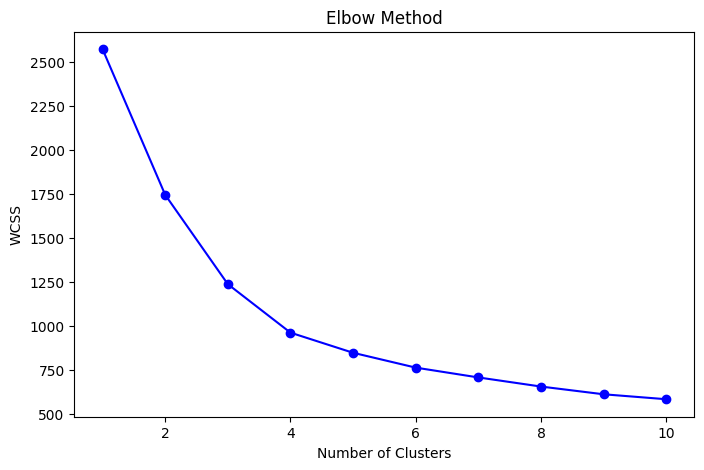

In [ ]:
# Inisialisasi sebuah list kosong untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares)
wcss = []

# Loop untuk mencari nilai WCSS untuk jumlah klaster dari 1 hingga 10
for k in range(1, 11):
    # Membuat objek KMeans dengan jumlah klaster k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Melatih model KMeans menggunakan data yang telah distandarisasi
    kmeans.fit(df_standardized)

    # Menyimpan nilai WCSS ke dalam list wcss
    wcss.append(kmeans.inertia_)

# Membuat gambar dengan ukuran 8x5 inch
plt.figure(figsize=(8, 5))

# Plot nilai WCSS terhadap jumlah klaster
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')

# Memberi label pada sumbu x dengan 'Number of Clusters'
plt.xlabel('Number of Clusters')

# Memberi label pada sumbu y dengan 'WCSS' (Within-Cluster Sum of Squares)
plt.ylabel('WCSS')

# Menambahkan judul pada plot, 'Elbow Method'
plt.title('Elbow Method')

# Menampilkan plot
plt.show()

Berdasarkan grafik elbow method tersebut, pada saat grafik mencapai k = 4, bentuk grafik berubah kearah yang semakin sejajar dengan sumbu x. Hal ini menandakan bahwa cluster optimal untuk mengelompokkan Kabupaten/Kota di Indonesia berdasarkan indikator IPM adalah 4 cluster.

**b. Calinski-Harabasz Index**
*   Calinski-Harabasz Index (CH Index) disebut juga dengan Variance Ratio Criterion (VRC)
*   Calinski-Harabasz Index (CH Index) adalah salah satu metrik evaluasi yang dapat digunakan untuk menentukan nilai k optimal dalam algoritma clustering.
*   Calinski-Harabasz Index dihitung berdasarkan perbandingan antara varians antara klaster dengan varians dalam klaster.
*   Nilai k optimal akan ditemukan pada titik di mana nilai CH Index mencapai puncak atau nilai tertinggi.
*   Titik ini menunjukkan jumlah klaster yang menghasilkan klasterisasi yang lebih terpisah dan konsisten.

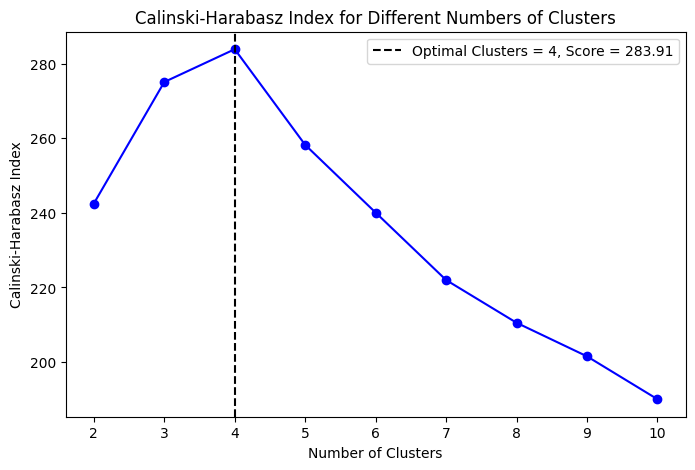

In [ ]:
# Memilih jumlah klaster yang ingin dievaluasi
n_clusters_range = range(2, 11)  # Coba dari 2 hingga 10 klaster

# Menyimpan nilai CHI untuk setiap jumlah klaster yang dicoba
chi_scores = []

# Melakukan iterasi melalui setiap nilai n_clusters dalam n_clusters_range
for n_clusters in n_clusters_range:
    # Menginisialisasi objek KMeans dengan jumlah klaster saat ini
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Melatih model KMeans dengan data yang telah distandarisasi
    kmeans.fit(df_standardized)

    # Menghitung nilai CH Index untuk klaster saat ini dan menyimpannya dalam chi_scores
    chi_scores.append(calinski_harabasz_score(df_standardized, kmeans.labels_))

# Membuat figure dengan ukuran 8x5 inch
plt.figure(figsize=(8, 5))

# Plot nilai CH Index untuk jumlah klaster dari 2 hingga 10, dengan nilai CH Index yang disimpan dalam chi_scores
plt.plot(range(2, 11), chi_scores, marker='o', linestyle='-', color='b')

# Memberi label pada sumbu x dengan 'Number of Clusters'
plt.xlabel('Number of Clusters')

# Memberi label pada sumbu y dengan 'Calinski-Harabasz Index'
plt.ylabel('Calinski-Harabasz Index')

# Menambahkan judul pada plot
plt.title('Calinski-Harabasz Index for Different Numbers of Clusters')

# Menemukan jumlah klaster yang memiliki nilai CH Index tertinggi
optimal_clusters = chi_scores.index(max(chi_scores)) + 2  # +2 karena dimulai dari 2 klaster

# Mendapatkan nilai tertinggi CH Index
max_chi = max(chi_scores)

# Menambahkan garis vertikal pada plot di titik jumlah klaster optimal, dengan label yang menunjukkan nilai k optimal dan CH Index tertinggi
plt.axvline(x=optimal_clusters, color='black', linestyle='--', label=f'Optimal Clusters = {optimal_clusters}, Score = {max_chi:.2f}')

# Menampilkan legenda pada plot
plt.legend()

# Menampilkan grafik
plt.show()

Grafik indeks Calinski-Harabasz menunjukkan bahwa cluster dengan nilai tertinggi adalah 4 cluster dengan nilai sebesar 283.91 yang menandakan bahwa cluster tersebut yang paling optimal.

In [ ]:
# Menginisialisasi objek KMeans dengan jumlah klaster 4
kmeans = KMeans(n_clusters=4, random_state=42)

# Melatih model KMeans menggunakan data yang telah distandarisasi
kmeans.fit(df_standardized)

# Menambahkan label cluster ke dataset
df['Cluster'] = kmeans.labels_

# Menampilkan dataset yang sudah ditambahkan kolom cluster
df

,Provinsi,Kabupaten/Kota,UHH,HLS,RLS,PPK,PPM,Cluster
0,Aceh,Simeulue,65.61,14.28,9.81,7686,17.92,0
1,Aceh,Aceh Singkil,67.78,14.35,8.70,9374,19.15,0
2,Aceh,Aceh Selatan,64.81,14.70,8.91,8712,12.10,0
3,Aceh,Aceh Tenggara,68.65,14.27,10.09,8566,12.45,0
4,Aceh,Aceh Timur,69.07,13.07,8.47,9436,13.39,0
...,...,...,...,...,...,...,...,...
509,Papua,Puncak,66.40,5.59,2.19,5975,36.44,2
510,Papua,Dogiyai,66.39,10.62,4.97,6182,29.20,2
511,Papua,Intan Jaya,66.12,7.69,3.27,6140,40.01,2
512,Papua,Deiyai,65.93,9.85,3.27,5104,38.66,2


In [ ]:
# Menghitung jumlah kabupaten/kota di setiap cluster
df['Cluster'].value_counts().sort_index()

0    138
1     86
2     18
3    272
Name: Cluster, dtype: int64

In [ ]:
# Menghitung nilai rata-rata dari setiap fitur dalam setiap cluster untuk mengetahui karakteristik tiap cluster
df.groupby('Cluster').mean()

,UHH,HLS,RLS,PPK,PPM
Cluster,,,,,
0,66.912174,13.169420,8.249928,9026.985507,17.285942
1,73.493372,14.720000,11.070698,15059.383721,6.121279
2,64.172222,9.279444,4.197778,5652.222222,33.632222
3,71.226103,12.898382,8.386875,11100.029412,8.800294




*   Cluster 0 termasuk kategori Sedang berdasarkan nilai rata-rata indikator HDI
*   Cluster 1 termasuk kategori Sangat Tinggi berdasarkan nilai rata-rata indikator HDI
*   Cluster 2 termasuk kategori Rendah berdasarkan nilai rata-rata indikator HDI
*   Cluster 3 termasuk kategori Tinggi berdasarkan nilai rata-rata indikator HDI

In [ ]:
# Mapping label cluster menjadi kategori Rendah, Sedang, dan Tinggi
label_map = {0: 'Sedang', 1: 'Sangat Tinggi', 2: 'Rendah', 3: 'Tinggi'}
df['Kategori'] = df['Cluster'].map(label_map)

# Simpan data ke dalam file Excel
df.to_excel('Clustering IPM 2023.xlsx', index=False)

# Tampilkan dataset yang telah diperbarui dengan kolom baru 'Kategori'
df

,Provinsi,Kabupaten/Kota,UHH,HLS,RLS,PPK,PPM,Cluster,Kategori
0,Aceh,Simeulue,65.61,14.28,9.81,7686,17.92,0,Sedang
1,Aceh,Aceh Singkil,67.78,14.35,8.70,9374,19.15,0,Sedang
2,Aceh,Aceh Selatan,64.81,14.70,8.91,8712,12.10,0,Sedang
3,Aceh,Aceh Tenggara,68.65,14.27,10.09,8566,12.45,0,Sedang
4,Aceh,Aceh Timur,69.07,13.07,8.47,9436,13.39,0,Sedang
...,...,...,...,...,...,...,...,...,...
509,Papua,Puncak,66.40,5.59,2.19,5975,36.44,2,Rendah
510,Papua,Dogiyai,66.39,10.62,4.97,6182,29.20,2,Rendah
511,Papua,Intan Jaya,66.12,7.69,3.27,6140,40.01,2,Rendah
512,Papua,Deiyai,65.93,9.85,3.27,5104,38.66,2,Rendah


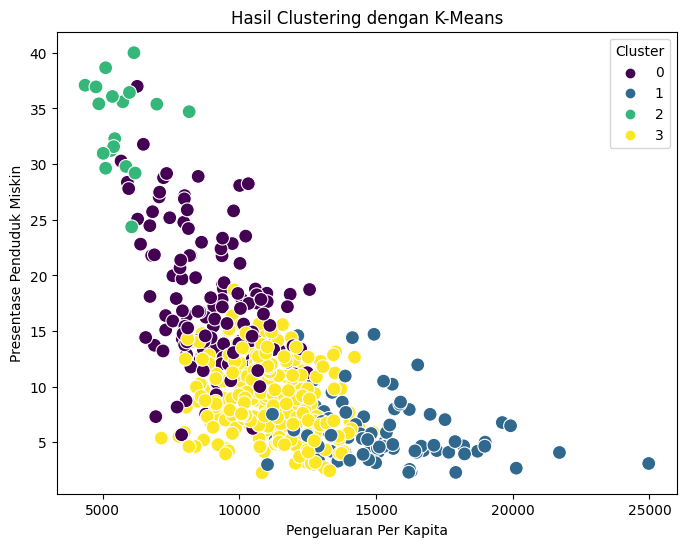

In [ ]:
# Membuat figure untuk plot dengan ukuran 8x6 inch
plt.figure(figsize=(8, 6))

# Menggambar scatter plot dengan sumbu x = 'PPK', sumbu y = 'PPM', dan warna titik berdasarkan 'Cluster'
# 'palette='viridis'' digunakan untuk memilih skema warna, dan 's=100' adalah ukuran titik
sns.scatterplot(x='PPK', y='PPM', hue='Cluster', data=df, palette='viridis', s=100)

# Menambahkan judul plot
plt.title('Hasil Clustering dengan K-Means')

# Memberi label pada sumbu x
plt.xlabel('Pengeluaran Per Kapita')

# Memberi label pada sumbu y
plt.ylabel('Presentase Penduduk Miskin')

# Menampilkan legenda untuk label 'Cluster' dengan judul 'Cluster'
plt.legend(title='Cluster')

# Menampilkan plot
plt.show()

*   Cluster 0 merupakan cluster dengan pengeluaran per kapita sedang dan presentase penduduk miskin sedang.
*   Cluster 1 merupakan cluster dengan pengeluaran per kapita sangat tinggi dan presentase penduduk miskin rendah.
*   Cluster 2 merupakan cluster dengan pengeluaran per kapita sangat rendah dan presentase penduduk miskin sangat tinggi.
*   Cluster 3 merupakan cluster dengan pengeluaran per kapita cukup tinggi dan presentase penduduk miskin cukup rendah.

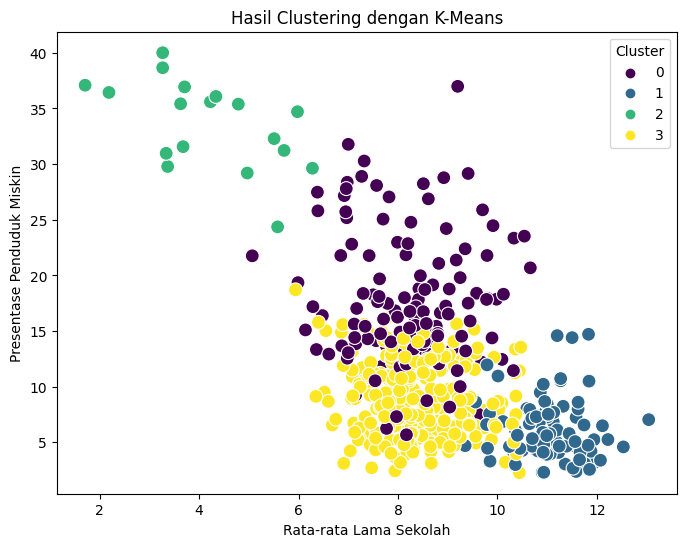

In [ ]:
# Membuat figure untuk plot dengan ukuran 8x6 inch
plt.figure(figsize=(8, 6))

# Menggambar scatter plot dengan sumbu x = 'RLS', sumbu y = 'PPM', dan warna titik berdasarkan 'Cluster'
# 'palette='viridis'' digunakan untuk memilih skema warna, dan 's=100' adalah ukuran titik
sns.scatterplot(x='RLS', y='PPM', hue='Cluster', data=df, palette='viridis', s=100)

# Menambahkan judul plot
plt.title('Hasil Clustering dengan K-Means')

# Memberi label pada sumbu x
plt.xlabel('Rata-rata Lama Sekolah')

# Memberi label pada sumbu y
plt.ylabel('Presentase Penduduk Miskin')

# Menampilkan legenda untuk label 'Cluster' dengan judul 'Cluster'
plt.legend(title='Cluster')

# Menampilkan plot
plt.show()

*   Cluster 0 merupakan cluster dengan rata-rata lama sekolah sedang dan presentase penduduk miskin sedang.
*   Cluster 1 merupakan cluster dengan rata-rata lama sekolah sangat tinggi dan presentase penduduk miskin rendah.
*   Cluster 2 merupakan cluster dengan rata-rata lama sekolah rendah dan presentase penduduk miskin sangat tinggi.
*   Cluster 3 merupakan cluster dengan rata-rata lama sekolah sedang dan presentase penduduk miskin rendah.

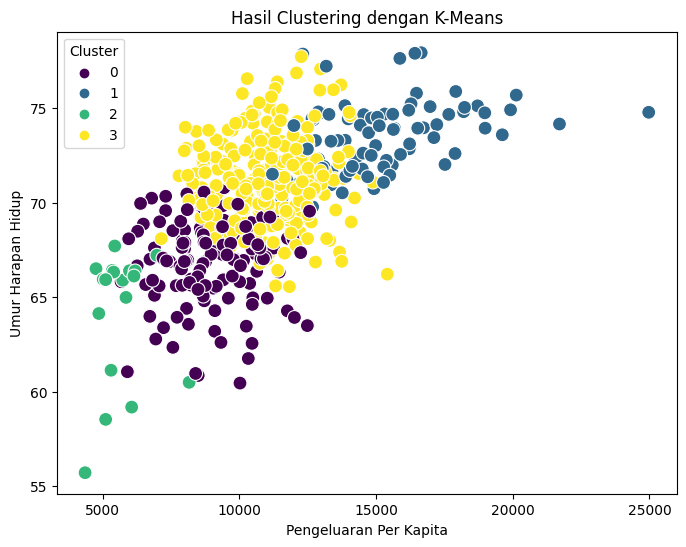

In [ ]:
# Membuat figure untuk plot dengan ukuran 8x6 inch
plt.figure(figsize=(8, 6))

# Menggambar scatter plot dengan sumbu x = 'PPK', sumbu y = 'UHH', dan warna titik berdasarkan 'Cluster'
# 'palette='viridis'' digunakan untuk memilih skema warna, dan 's=100' adalah ukuran titik
sns.scatterplot(x='PPK', y='UHH', hue='Cluster', data=df, palette='viridis', s=100)

# Menambahkan judul plot
plt.title('Hasil Clustering dengan K-Means')

# Memberi label pada sumbu x
plt.xlabel('Pengeluaran Per Kapita')

# Memberi label pada sumbu y
plt.ylabel('Umur Harapan Hidup')

# Menampilkan legenda untuk label 'Cluster' dengan judul 'Cluster'
plt.legend(title='Cluster')

# Menampilkan plot
plt.show()

*   Cluster 0 merupakan cluster dengan pengeluaran per kapita sedang dan umur harapan hidup sedang.
*   Cluster 1 merupakan cluster dengan pengeluaran per kapita sangat tinggi dan umur harapan hidup sangat tinggi.
*   Cluster 2 merupakan cluster dengan pengeluaran per kapita sangat rendah dan umur harapan hidup rendah.
*   Cluster 3 merupakan cluster dengan pengeluaran per kapita sedang dan umur harapan hidup tinggi.

In [ ]:
# Mengelompokkan data berdasarkan Provinsi dan Cluster, kemudian menghitung jumlah kabupaten/kota di setiap cluster
df.groupby(['Provinsi', 'Cluster']).size().unstack(fill_value=0)

Cluster,0,1,2,3
Provinsi,,,,
Aceh,16,4,0,3
Bali,0,4,0,5
Banten,1,2,0,5
Bengkulu,6,1,0,3
DI Yogyakarta,0,3,0,2
DKI Jakarta,0,5,0,1
Gorontalo,5,1,0,0
Jambi,1,2,0,8
Jawa Barat,0,5,0,22


In [ ]:
# Filter kabupaten/kota yang masuk ke Cluster 0
cluster_0_data = df[df['Cluster'] == 0]

# Menampilkan nama kabupaten/kota yang masuk ke Cluster 0
cluster_0_data['Kabupaten/Kota'].values

array(['Simeulue', 'Aceh Singkil', 'Aceh Selatan', 'Aceh Tenggara',
       'Aceh Timur', 'Aceh Tengah', 'Aceh Barat', 'Pidie', 'Aceh Utara',
       'Aceh Barat Daya', 'Gayo Lues', 'Nagan Raya', 'Aceh Jaya',
       'Bener Meriah', 'Pidie Jaya', 'Kota Subulussalam', 'Nias',
       'Mandailing Natal', 'Tapanuli Tengah', 'Nias Selatan',
       'Pakpak Bharat', 'Nias Utara', 'Nias Barat', 'Kota Tanjung Balai',
       'Kepulauan Mentawai', 'Kepulauan Meranti', 'Tanjung Jabung Timur',
       'Lahat', 'Musi Rawas', 'Ogan Komering Ulu Selatan', 'Ogan Ilir',
       'Empat Lawang', 'Musi Rawas Utara', 'Bengkulu Selatan',
       'Rejang Lebong', 'Kaur', 'Seluma', 'Lebong', 'Kepahiang',
       'Lampung Utara', 'Pesawaran', 'Pesisir Barat', 'Lingga',
       'Bondowoso', 'Probolinggo', 'Bangkalan', 'Sampang', 'Pamekasan',
       'Pandeglang', 'Lombok Barat', 'Lombok Tengah', 'Lombok Timur',
       'Sumbawa', 'Dompu', 'Bima', 'Lombok Utara', 'Sumba Barat',
       'Sumba Timur', 'Kupang', 'Timor Tengah

In [ ]:
# Filter kabupaten/kota yang masuk ke Cluster 1
cluster_1_data = df[df['Cluster'] == 1]

# Menampilkan nama kabupaten/kota yang masuk ke Cluster 1
cluster_1_data['Kabupaten/Kota'].values

array(['Kota Banda Aceh', 'Kota Sabang', 'Kota Langsa',
       'Kota Lhokseumawe', 'Toba Samosir / Toba', 'Deli Serdang',
       'Kota Pematang Siantar', 'Kota Tebing Tinggi', 'Kota Medan',
       'Kota Binjai', 'Kota Padangsidimpuan', 'Kota Padang', 'Kota Solok',
       'Kota Padang Panjang', 'Kota Bukittinggi', 'Kota Payakumbuh',
       'Kota Pariaman', 'Kota Pekanbaru', 'Kota Jambi',
       'Kota Sungai Penuh', 'Kota Palembang', 'Kota Bengkulu',
       'Kota Bandar Lampung', 'Kota Metro', 'Kota Pangkal Pinang',
       'Kota Batam', 'Kota Tanjung Pinang', 'Kota Jakarta Selatan',
       'Kota Jakarta Timur', 'Kota Jakarta Pusat', 'Kota Jakarta Barat',
       'Kota Jakarta Utara', 'Kota Bogor', 'Kota Bandung', 'Kota Bekasi',
       'Kota Depok', 'Kota Cimahi', 'Sukoharjo', 'Kota Magelang',
       'Kota Surakarta', 'Kota Salatiga', 'Kota Semarang', 'Bantul',
       'Sleman', 'Kota Yogyakarta', 'Sidoarjo', 'Gresik', 'Kota Kediri',
       'Kota Blitar', 'Kota Malang', 'Kota Pasuruan', 'Ko

In [ ]:
# Filter kabupaten/kota yang masuk ke Cluster 2
cluster_2_data = df[df['Cluster'] == 2]

# Menampilkan nama kabupaten/kota yang masuk ke Cluster 2
cluster_2_data['Kabupaten/Kota'].values

array(['Tambrauw', 'Pegunungan Arfak', 'Jayawijaya', 'Paniai',
       'Puncak Jaya', 'Asmat', 'Yahukimo', 'Pegunungan Bintang',
       'Tolikara', 'Mamberamo Raya', 'Nduga', 'Lanny Jaya',
       'Mamberamo Tengah', 'Yalimo', 'Puncak', 'Dogiyai', 'Intan Jaya',
       'Deiyai'], dtype=object)

In [ ]:
# Filter kabupaten/kota yang masuk ke Cluster 3
cluster_3_data = df[df['Cluster'] == 3]

# Menampilkan nama kabupaten/kota yang masuk ke Cluster 3
cluster_3_data['Kabupaten/Kota'].values

array(['Aceh Besar', 'Bireuen', 'Aceh Tamiang', 'Tapanuli Selatan',
       'Tapanuli Utara', 'Labuhan Batu', 'Asahan', 'Simalungun', 'Dairi',
       'Karo', 'Langkat', 'Humbang Hasundutan', 'Samosir',
       'Serdang Bedagai', 'Batu Bara', 'Padang Lawas Utara',
       'Padang Lawas', 'Labuhan Batu Selatan', 'Labuhan Batu Utara',
       'Kota Sibolga', 'Kota Gunungsitoli', 'Pesisir Selatan', 'Solok',
       'Sijunjung', 'Tanah Datar', 'Padang Pariaman', 'Agam',
       'Lima Puluh Kota', 'Pasaman', 'Solok Selatan', 'Dharmasraya',
       'Pasaman Barat', 'Kota Sawah Lunto', 'Kuantan Singingi',
       'Indragiri Hulu', 'Indragiri Hilir', 'Pelalawan', 'Siak', 'Kampar',
       'Rokan Hulu', 'Bengkalis', 'Rokan Hilir', 'Kota Dumai', 'Kerinci',
       'Merangin', 'Sarolangun', 'Batang Hari', 'Muaro Jambi',
       'Tanjung Jabung Barat', 'Tebo', 'Bungo', 'Ogan Komering Ulu',
       'Ogan Komering Ilir', 'Muara Enim', 'Musi Banyuasin', 'Banyu Asin',
       'Ogan Komering Ulu Timur', 'Penukal Aba

### **Rekomendasi**

Berdasarkan hasil clustering yang sudah dilakukan, Kabupaten/Kota di Indonesia yang harus lebih diperhatikan pemerintah adalah Kabupaten/Kota yang ada di Cluster 2. Pemerintah harus meprioritaskan Kabupaten/Kota yang ada di Cluster 2 terlebih dahulu dalam meningkatkan pembangunan manusia, pendidikan, infrastruktur, dan mengentaskan kemiskinan.


Kemudian prioritas kedua dalam upaya meningkatkan pembangunan manusia, pendidikan, infrastruktur, dan pengentasan kemiskinan adalah Kabupaten/Kota yang ada di Cluster 0 karena nilai IPM nya termasuk ke dalam kategori sedang.


Kemudian untuk Kabupaten/Kota yang berada di Cluster 1 dan 3, dapat dijadikan contoh dalam upaya meningkatkan pembangunan manusia, karena pada cluster tersebut kualitas pendidikannya sudah sangat baik, banyak infrastruktur yang sudah dibangun, dan rendahnya penduduk miskin di daerah tersebut yang menandakan bahwa banyak masyarakat yang sudah mendapatkan kehidupan yang layak.

### **Kesimpulan**

Klasterisasi Kabupaten/Kota di Indonesia berdasarkan indikator Indeks Pembangunan Manusia, seperti umur harapan hidup saat lahir, harapan lama sekolah, rata-rata lama sekolah, pengeluaran per kapita yang disesuaikan, dan presentase penduduk miskin pada tahun 2023 menggunakan algoritma K-Means, menghasilkan 4 cluster optimum. Dari hasil clustering terdapat 138 Kabupaten/Kota pada Cluster 0, 86 Kabupaten/Kota pada Cluster 1, 18 Kabupaten/Kota pada Cluster 2, dan 272 Kabupaten/Kota pada Cluster 3. Hasil analisis menunjukkan bahwa Cluster 0 merupakan Kabupaten/Kota dengan IPM sedang, Cluster 1 merupakan Kabupaten/Kota dengan IPM sangat tinggi, Cluster 2 merupakan Kabupaten/Kota dengan IPM rendah, dan Cluster 3 merupakan Kabupaten/Kota dengan IPM tinggi.

Dari hasil penelitian tersebut, dapat diberikan rekomendasi kepada pemerintah untuk memprioritaskan pembangunan manusia, pendidikan, infrastruktur, dan pengentasan kemiskinan pada Kabupaten/Kota yang berada di Cluster 2, kemudian prioritas kedua untuk Kabupaten/Kota yang berada di Cluster 0, dan Kabupaten/Kota yang berada di Cluster 1 dan 3 dapat dijadikan daerah percontohan dalam upaya meningkatkan pembangunan manusia, pendidikan, infrastruktur, dan pengentasan kemiskinan.

Untuk penelitian selanjutnya, bisa dilakukan analisis lebih dalam lagi agar klusterisasi yang dihasilkan saling terpisah dengan jelas dan memiliki homogenitas yang tinggi di dalamnya, terutama untuk menganalisis lebih dalam data outlier.